In [1]:
wiki = read.csv("wiki.csv", stringsAsFactors=FALSE)


In [2]:
wiki$Vandal = as.factor(wiki$Vandal)

In [3]:
table(wiki$Vandal)


   0    1 
2061 1815 

In [6]:
library(tm)
library(SnowballC)

Loading required package: NLP


In [7]:
length(stopwords("english"))

[1] 174

In [8]:
# Create corpus
corpusAdded = Corpus(VectorSource(wiki$Added))
#corpusAdded = tm_map(corpusAdded, tolower)
#corpusAdded = tm_map(corpusAdded, PlainTextDocument)
#corpusAdded = tm_map(corpusAdded, removePunctuation)
corpusAdded = tm_map(corpusAdded, removeWords, stopwords("english"))
corpusAdded = tm_map(corpusAdded, stemDocument)


dtmAdded = DocumentTermMatrix(corpusAdded)
dtmAdded

<<DocumentTermMatrix (documents: 3876, terms: 6675)>>
Non-/sparse entries: 15368/25856932
Sparsity           : 100%
Maximal term length: 784
Weighting          : term frequency (tf)

In [16]:
# Remove sparse terms
sparseAdded = removeSparseTerms(dtmAdded, 0.997)
sparseAdded

<<DocumentTermMatrix (documents: 3876, terms: 166)>>
Non-/sparse entries: 2681/640735
Sparsity           : 100%
Maximal term length: 28
Weighting          : term frequency (tf)

In [18]:
# Convert to a data frame
wordsAdded = as.data.frame(as.matrix(sparseAdded))

# Make all variable names R-friendly
colnames(wordsAdded) = paste("A",colnames(wordsAdded))



In [20]:
corpusRemoved = Corpus(VectorSource(wiki$Removed))
corpusRemoved = tm_map(corpusRemoved, removeWords, stopwords("english"))
corpusRemoved = tm_map(corpusRemoved, stemDocument)
dtmRemoved = DocumentTermMatrix(corpusRemoved)
sparseRemoved = removeSparseTerms(dtmRemoved, 0.997)
wordsRemoved = as.data.frame(as.matrix(sparseRemoved))
colnames(wordsRemoved) = paste("R",colnames(wordsRemoved))


In [22]:
str(wordsRemoved)

'data.frame':	3876 obs. of  162 variables:
 $ R 2000000                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R 40000                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R accord                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R actual                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R ago                         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R agre                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R analog                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R appar                       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R arbitrari                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R believ                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R bigger                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R biolog                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R biologyanalog               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ R bodi                        : num  0 0 0 1 0 0 0 0 0 0 ...
 $ R call                        : num  0 0 0 1 0 0 0 0 0 0 .

In [23]:
wikiWords = cbind(wordsAdded, wordsRemoved)

In [24]:
wikiWords$Vandal = wiki$Vandal

In [25]:
library(caTools)

set.seed(123)

split = sample.split(wikiWords$Vandal, SplitRatio = 0.7)

train = subset(wikiWords, split==TRUE)
test = subset(wikiWords, split==FALSE)


In [27]:
table(test$Vandal)


  0   1 
618 545 

In [28]:
618/(618+545)

[1] 0.5313844

In [30]:
library(rpart)
library(rpart.plot)

wikiCART = rpart(Vandal ~ ., data=train, method="class")


In [32]:
predictCART = predict(wikiCART, newdata=test, type="class")

table(test$Vandal, predictCART)

   predictCART
      0   1
  0 618   0
  1 533  12

In [33]:
(618+12)/(618+12+533)

[1] 0.5417025

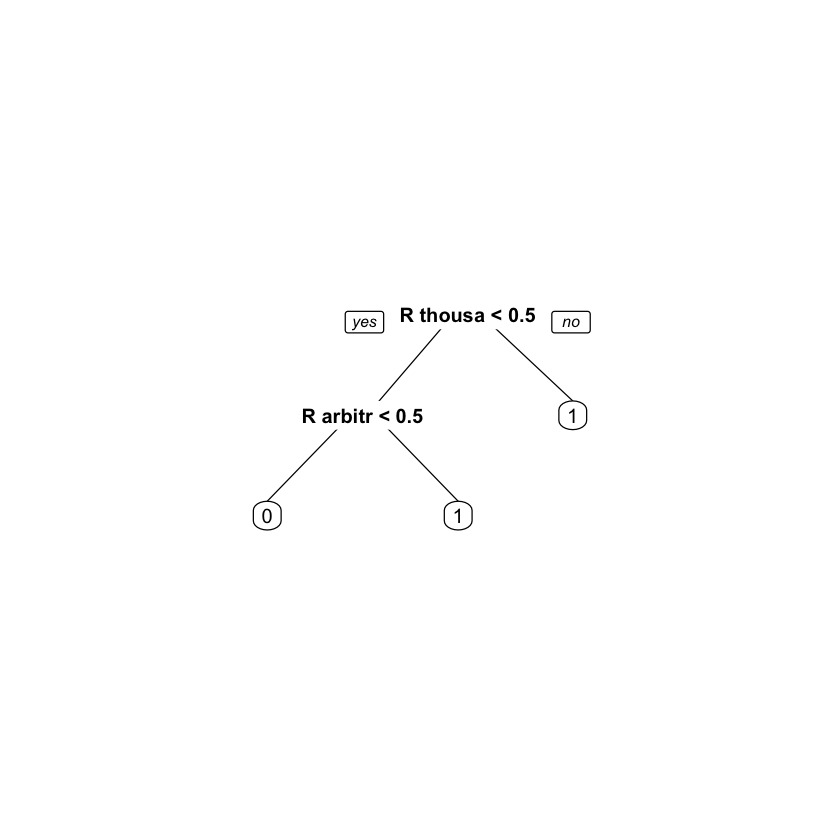

In [34]:
prp(wikiCART)

In [35]:
wikiWords2 = wikiWords

wikiWords2$HTTP = ifelse(grepl("http",wiki$Added,fixed=TRUE), 1, 0)

In [36]:
table(wikiWords2$HTTP)


   0    1 
3659  217 

In [38]:
wikiTrain2 = subset(wikiWords2, split==TRUE)

wikiTest2 = subset(wikiWords2, split==FALSE)

In [39]:
wikiCART2 = rpart(Vandal ~ ., data=wikiTrain2, method="class")


In [40]:
predictCART2 = predict(wikiCART2, newdata=wikiTest2, type="class")

table(wikiTest2$Vandal, predictCART2)

   predictCART2
      0   1
  0 609   9
  1 488  57

In [42]:
(609+57)/(609+9+488+57)

[1] 0.5726569

In [43]:
wikiWords2$NumWordsAdded = rowSums(as.matrix(dtmAdded))

wikiWords2$NumWordsRemoved = rowSums(as.matrix(dtmRemoved))

In [44]:
mean(wikiWords2$NumWordsAdded)

[1] 4.050052

In [45]:
wikiTrain3 = subset(wikiWords2, split==TRUE)

wikiTest3 = subset(wikiWords2, split==FALSE)

In [46]:
wikiCART3 = rpart(Vandal ~ ., data=wikiTrain3, method="class")


In [47]:
predictCART3 = predict(wikiCART3, newdata=wikiTest3, type="class")

table(wikiTest3$Vandal, predictCART3)

   predictCART3
      0   1
  0 514 104
  1 297 248

In [48]:
(514+248)/(514+248+104+297)

[1] 0.6552021

In [49]:
wikiWords3 = wikiWords2

In [50]:
wikiWords3$Minor = wiki$Minor

wikiWords3$Loggedin = wiki$Loggedin

In [51]:
wikiTrain4 = subset(wikiWords3, split==TRUE)

wikiTest4 = subset(wikiWords3, split==FALSE)

wikiCART4 = rpart(Vandal ~ ., data=wikiTrain4, method="class")


In [52]:
predictCART4 = predict(wikiCART4, newdata=wikiTest4, type="class")

table(wikiTest4$Vandal, predictCART4)

   predictCART4
      0   1
  0 595  23
  1 304 241

In [53]:
(595+241)/(595+241+304+23)

[1] 0.7188306

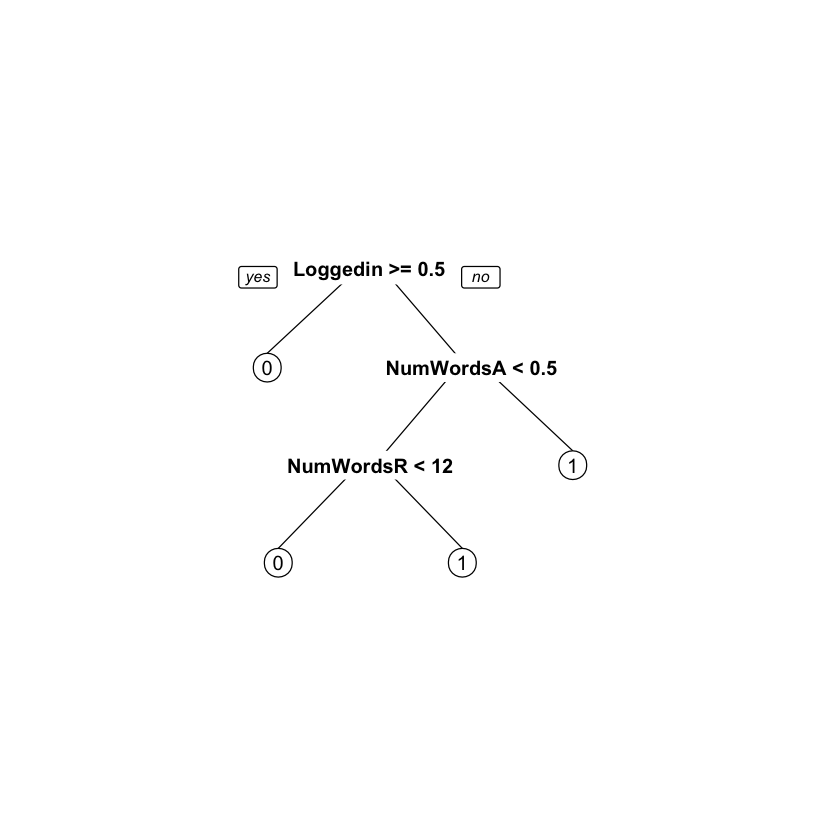

In [54]:
prp(wikiCART4)